In [3]:
import numpy as np
from skimage import io
from scipy.ndimage import find_objects
from bioio import BioImage
from skimage import measure
from shape_analysis import labels_statistics, extract_nematics_3d
import matplotlib.pyplot as plt
import pyshtools as pysh

In [4]:
img = BioImage("image.nd2")
spacing = np.asarray(img.physical_pixel_sizes)
image = img.get_image_data("ZYXC")
labels = io.imread("labels.tif")

In [5]:
statistics_dict = labels_statistics(labels, image[...,1:], spacing=spacing, add_meshes=True)

In [6]:
verts = statistics_dict[1]['mesh']['verts']
faces = statistics_dict[1]['mesh']['faces']

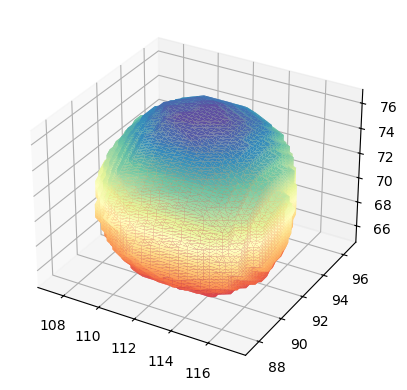

In [7]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],cmap='Spectral', lw=1)
#ax.scatter(verts[:,0], verts[:,1], verts[:,2], cmap='Spectral', s=1)
plt.show()